In [23]:
import pandas as pd
import sklearn
import plotly
import scipy
import sympy
import statsmodels
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
col_name = ['age' , 'workclass' , 'fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','result']
train = pd.read_csv(url, sep=' ', header = None, names= col_name)

In [25]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null object
workclass         32561 non-null object
fnlwgt            32561 non-null object
education         32561 non-null object
education-num     32561 non-null object
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null object
capital-loss      32561 non-null object
hours-per-week    32561 non-null object
native-country    32561 non-null object
result            32561 non-null object
dtypes: object(15)
memory usage: 3.7+ MB


In [27]:
d= train.describe()

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

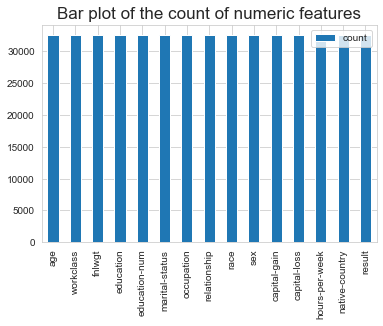

In [28]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

Text(0.5, 1.0, 'Fraction of relationship affect result by class')

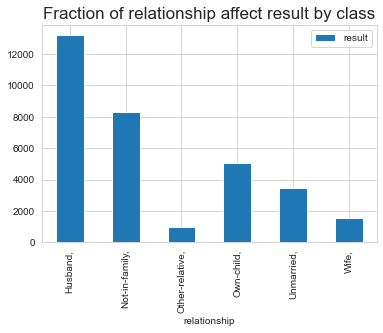

In [29]:
f_class_result=train.groupby('relationship')['result'].count()
f_class_result = pd.DataFrame(f_class_result)
f_class_result
f_class_result.plot.bar(y='result')
plt.title("Fraction of relationship affect result by class",fontsize=17)

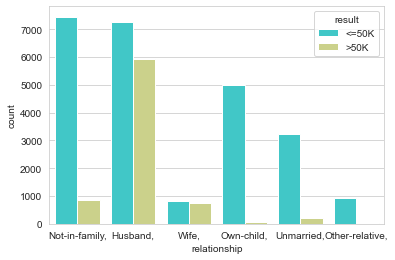

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='relationship' ,hue='result' ,data=train,palette='rainbow')

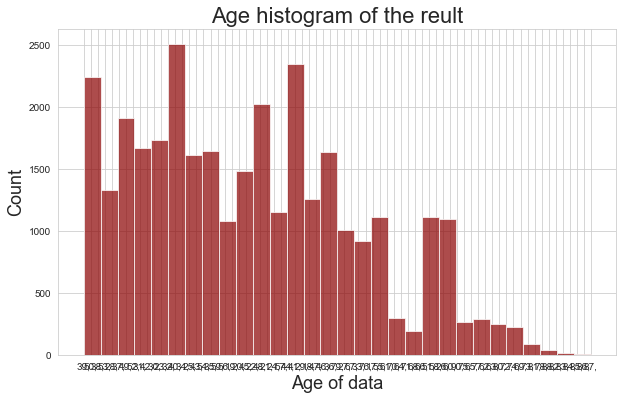

In [31]:
plt.xlabel("Age of data",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the reult",fontsize=22)
train['age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))

In [32]:
train.info

<bound method DataFrame.info of        age          workclass   fnlwgt    education education-num  \
0      39,         State-gov,   77516,   Bachelors,           13,   
1      50,  Self-emp-not-inc,   83311,   Bachelors,           13,   
2      38,           Private,  215646,     HS-grad,            9,   
3      53,           Private,  234721,        11th,            7,   
4      28,           Private,  338409,   Bachelors,           13,   
...    ...                ...      ...          ...           ...   
32556  27,           Private,  257302,  Assoc-acdm,           12,   
32557  40,           Private,  154374,     HS-grad,            9,   
32558  58,           Private,  151910,     HS-grad,            9,   
32559  22,           Private,  201490,     HS-grad,            9,   
32560  52,      Self-emp-inc,  287927,     HS-grad,            9,   

            marital-status          occupation    relationship    race  \
0           Never-married,       Adm-clerical,  Not-in-family,  W

In [33]:
train['age']= train['age'].str.extract('(\d+)', expand=False).astype(int)

In [34]:
train['fnlwgt']= train['fnlwgt'].str.extract('(\d+)', expand=False).astype(int)
train['education-num']= train['education-num'].str.extract('(\d+)', expand=False).astype(int)
train['capital-gain']= train['capital-gain'].str.extract('(\d+)', expand=False).astype(int)
train['capital-loss']= train['capital-loss'].str.extract('(\d+)', expand=False).astype(int)
train['hours-per-week']= train['hours-per-week'].str.extract('(\d+)', expand=False).astype(int)

In [35]:
sex  = pd.get_dummies(train['sex'],drop_first=True)
train.drop(['sex'],axis=1,inplace=True)
train = pd.concat([train,sex],axis=1)
race  = pd.get_dummies(train['race'],drop_first=True)
train.drop(['race'],axis=1,inplace=True)
train = pd.concat([train,race],axis=1)
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,result,"Male,","Asian-Pac-Islander,","Black,","Other,","White,"
0,39,"State-gov,",77516,"Bachelors,",13,"Never-married,","Adm-clerical,","Not-in-family,",2174,0,40,"United-States,",<=50K,1,0,0,0,1
1,50,"Self-emp-not-inc,",83311,"Bachelors,",13,"Married-civ-spouse,","Exec-managerial,","Husband,",0,0,13,"United-States,",<=50K,1,0,0,0,1
2,38,"Private,",215646,"HS-grad,",9,"Divorced,","Handlers-cleaners,","Not-in-family,",0,0,40,"United-States,",<=50K,1,0,0,0,1
3,53,"Private,",234721,"11th,",7,"Married-civ-spouse,","Handlers-cleaners,","Husband,",0,0,40,"United-States,",<=50K,1,0,1,0,0
4,28,"Private,",338409,"Bachelors,",13,"Married-civ-spouse,","Prof-specialty,","Wife,",0,0,40,"Cuba,",<=50K,0,0,1,0,0


In [36]:
result  = pd.get_dummies(train['result'],drop_first=True)
train.drop(['result'],axis=1,inplace=True)
train = pd.concat([train,result],axis=1)
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,"Male,","Asian-Pac-Islander,","Black,","Other,","White,",>50K
0,39,"State-gov,",77516,"Bachelors,",13,"Never-married,","Adm-clerical,","Not-in-family,",2174,0,40,"United-States,",1,0,0,0,1,0
1,50,"Self-emp-not-inc,",83311,"Bachelors,",13,"Married-civ-spouse,","Exec-managerial,","Husband,",0,0,13,"United-States,",1,0,0,0,1,0
2,38,"Private,",215646,"HS-grad,",9,"Divorced,","Handlers-cleaners,","Not-in-family,",0,0,40,"United-States,",1,0,0,0,1,0
3,53,"Private,",234721,"11th,",7,"Married-civ-spouse,","Handlers-cleaners,","Husband,",0,0,40,"United-States,",1,0,1,0,0,0
4,28,"Private,",338409,"Bachelors,",13,"Married-civ-spouse,","Prof-specialty,","Wife,",0,0,40,"Cuba,",0,0,1,0,0,0


In [37]:
#get all variables with only 0 1
cat_vars=['workclass','education','marital-status','occupation','relationship','native-country']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train[var], prefix=var)
    train1=train.join(cat_list)
    train= train1
    train.drop([var],axis=1,inplace=True)
cat_vars=['workclass','education','marital-status','occupation','relationship','native-country']
data_vars=train.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [38]:
train_final=train[to_keep]
train_final.columns.values

array(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Male,', 'Asian-Pac-Islander,', 'Black,',
       'Other,', 'White,', '>50K', 'workclass_?,',
       'workclass_Federal-gov,', 'workclass_Local-gov,',
       'workclass_Never-worked,', 'workclass_Private,',
       'workclass_Self-emp-inc,', 'workclass_Self-emp-not-inc,',
       'workclass_State-gov,', 'workclass_Without-pay,',
       'education_10th,', 'education_11th,', 'education_12th,',
       'education_1st-4th,', 'education_5th-6th,', 'education_7th-8th,',
       'education_9th,', 'education_Assoc-acdm,', 'education_Assoc-voc,',
       'education_Bachelors,', 'education_Doctorate,',
       'education_HS-grad,', 'education_Masters,', 'education_Preschool,',
       'education_Prof-school,', 'education_Some-college,',
       'marital-status_Divorced,', 'marital-status_Married-AF-spouse,',
       'marital-status_Married-civ-spouse,',
       'marital-status_Married-spouse-absent,',
       '

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('>50K',axis=1), 
                                                    train['>50K'], test_size=0.30, 
                                                    random_state=111)

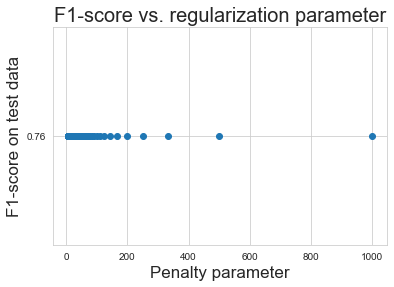

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu
for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

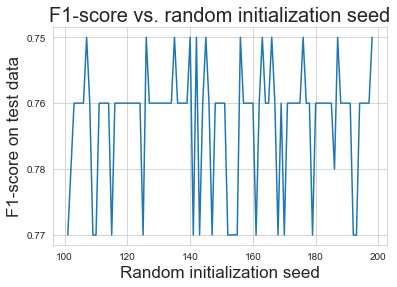

In [43]:
nsimu=101
class_report = [0]*nsimu
f1=[0]*nsimu
random_init =[0]*nsimu
for i in range(1,nsimu):
        X_train, X_test, y_train, y_test = train_test_split(train.drop('>50K',axis=1), 
                                                    train['>50K'], test_size=0.3, 
                                                    random_state=i+100)
        logmodel =(LogisticRegression(C=1,tol=1e-5, max_iter=1000,n_jobs=4))
        logmodel.fit(X_train,y_train)
        predictions = logmodel.predict(X_test)
        class_report[i] = classification_report(y_test,predictions)
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        random_init[i]=i+100

plt.plot(random_init[1:len(random_init)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. random initialization seed",fontsize=20)
plt.xlabel("Random initialization seed",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()